# Test NeuralNet class

In [20]:
from NeuralNet import NeuralNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load the dataset

### Separate data without normalization

In [21]:
# Load the file and converted into de dataframe
df = pd.read_csv('data_clean.csv')
df = df.select_dtypes(include = ['float64', 'int64'])

# Separate the input and output columns
y = df['SalePrice'].values
X = df.drop('SalePrice', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#store the min and the max of each column to denormalize the data later
min_max = {}
for column in df.columns:
    min_max[column] = [df[column].abs().min(), df[column].abs().max()]

# normalize all the data of the dataframe between 0 and 1
df_scaled = df.copy()

#normalize the data between 0 and 1 using the min_max dictionary
for column in df_scaled.columns:
    df_scaled[column] = 0.1 + 0.8 * (df_scaled[column] - min_max[column][0])  / (min_max[column][1] - min_max[column][0])

yn = df_scaled['SalePrice'].values
Xn = df_scaled.drop('SalePrice', axis=1).values

# Split the data into training and testing sets
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

In [23]:
nn = NeuralNet(layers=[Xn_train.shape[1], 64, 32, 1], function='relu')
nn.fit(Xn_train, yn_train)

Epoch 0/1000 - Training Error: 0.013898 - Validation Error: 0.014838
Epoch 100/1000 - Training Error: 0.002781 - Validation Error: 0.004281
Epoch 200/1000 - Training Error: 0.002182 - Validation Error: 0.003602
Epoch 300/1000 - Training Error: 0.001916 - Validation Error: 0.003272
Epoch 400/1000 - Training Error: 0.001796 - Validation Error: 0.003200
Epoch 500/1000 - Training Error: 0.001647 - Validation Error: 0.003190
Epoch 600/1000 - Training Error: 0.001526 - Validation Error: 0.003173
Epoch 700/1000 - Training Error: 0.001441 - Validation Error: 0.003232
Epoch 800/1000 - Training Error: 0.001352 - Validation Error: 0.003265
Epoch 900/1000 - Training Error: 0.001804 - Validation Error: 0.003915


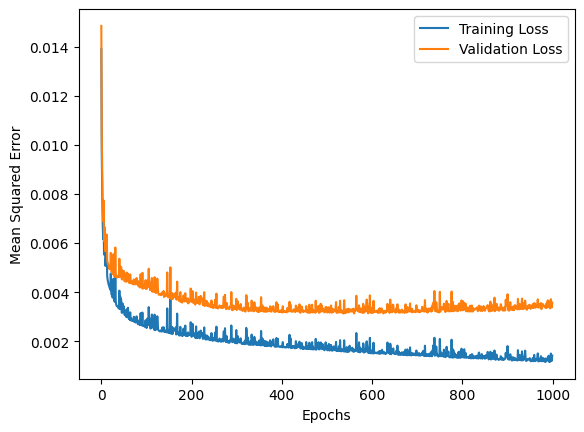

Predictions: [0.52992752 0.50944421 0.42365477 0.23695316 0.46820717 0.50535241
 0.44756862 0.58055407 0.35455924 0.33533399 0.48239694 0.36437289
 0.39221446 0.41759393 0.32867266 0.81791085 0.92185049 0.44309367
 0.53810203 0.51820243 0.34558226 0.63291278 0.39923599 0.56038091
 0.42564845 0.41417261 0.37717057 0.10194522 0.52740821 0.44628138
 0.34140761 0.50059312 0.48929516 0.24524913 0.49068707 0.75564766
 0.27844327 0.42387828 0.6233965  0.23489155 0.42741835 0.31419626
 0.24330821 0.47822029 0.43800436 0.20727246 0.33375416 0.40646025
 0.4526624  0.76830746 0.62577936 0.15256934 0.80014745 0.31690705
 0.33884877 0.32750953 0.23329299 0.5609267  0.36822937 0.58638855
 0.39272814 0.69865409 0.86588604 0.69595699 0.30729629 0.30543468
 0.44545875 0.52380643 0.28566872 0.46795323 0.47118879 0.67241184
 0.30407008 0.27929507 0.56320921 0.20546425 0.50326125 0.1284014
 0.53783843 0.51007919 0.42873404 0.69158623 0.39339572 0.23542638
 0.33978934 0.42204023 0.50089737 0.44351803 0.521

In [24]:
train_loss, val_loss = nn.loss_epochs()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
predictions = nn.predict(Xn_test)
print("Predictions:", predictions.flatten())

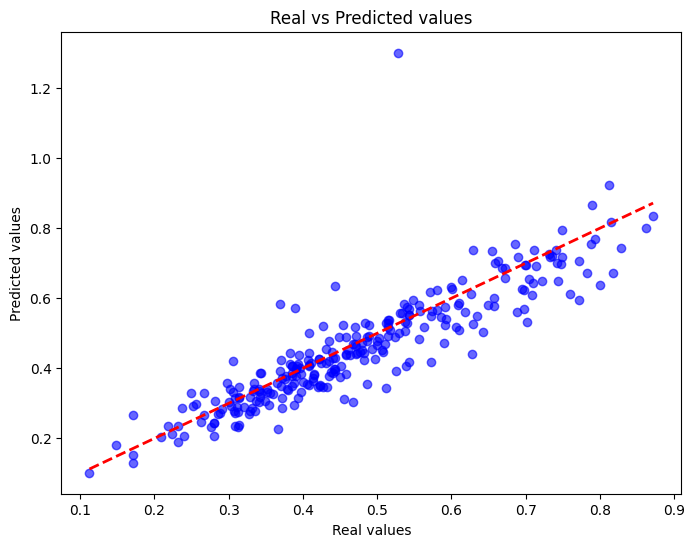

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.show()

In [27]:
# Denormalization

# predictions
pred_train = nn.predict(Xn_train)
pred_test = nn.predict(Xn_test)

# data denormalization
pred_train = min_max['SalePrice'][0] + (pred_train - 0.1) * (min_max['SalePrice'][1] - min_max['SalePrice'][0]) / 0.8
pred_test = min_max['SalePrice'][0] + (pred_test - 0.1) * (min_max['SalePrice'][1] - min_max['SalePrice'][0]) / 0.8

err_nn_train = 100 * sum(abs(pred_train - y_train)) / sum(y_train)
err_nn_test = 100 * sum(abs(pred_test - y_test)) / sum(y_test)

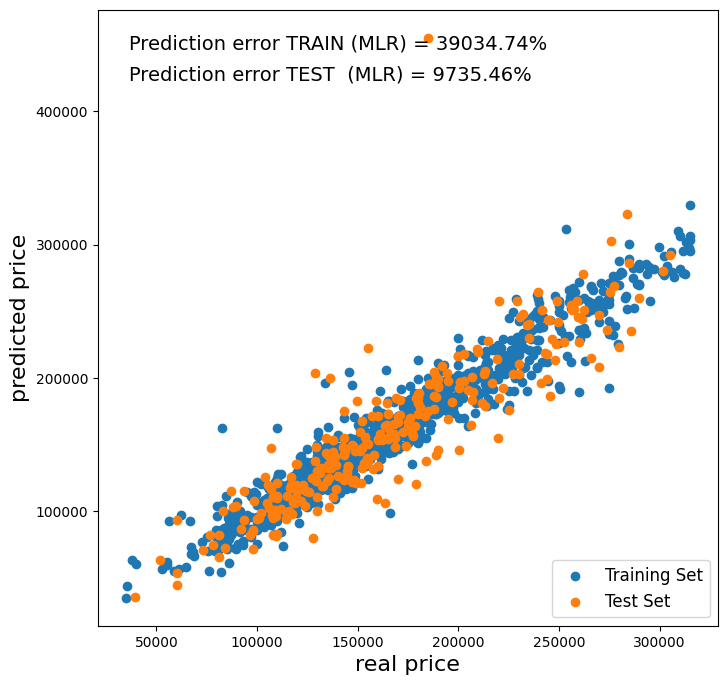

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_train, pred_train, label='Training Set')
ax.scatter(y_test, pred_test, label='Test Set')
ax.set_xlabel("real price", fontsize=16)
ax.set_ylabel("predicted price", fontsize=16)

# label text: fija el nombre correcto (TRAIN / TEST)
ax.text(0.05, 0.90, f"Prediction error TRAIN (MLR) = {err_nn_train_f:.2f}%\n", transform=ax.transAxes, fontsize=14)
ax.text(0.05, 0.85, f"Prediction error TEST  (MLR) = {err_nn_test_f:.2f}%\n",  transform=ax.transAxes, fontsize=14)

ax.legend(loc='lower right', fontsize=12)
plt.show()